In [97]:
#Store these environment variables for later
la_vaca = 'moo'
ben = 'yees?'

In [98]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm

from imblearn.over_sampling import SMOTE


In [99]:
processed_df = pd.read_pickle('./processed_df.pkl')

In [100]:
X = processed_df['string_tokens']
y = processed_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .05, stratify = y)

In [101]:
vectorizer = TfidfVectorizer(min_df = 0.05, max_df = 0.95)

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [102]:
oversample = SMOTE()
X_train_vect, y_train = oversample.fit_resample(X_train_vect, y_train)

In [103]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)


KNeighborsClassifier()

In [104]:
y_preds_k = k_neighbors.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


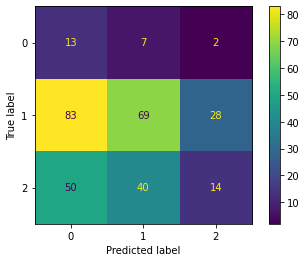

In [105]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [106]:
print(classification_report(y_preds_k, y_test))

              precision    recall  f1-score   support

           0       0.59      0.09      0.15       146
           1       0.38      0.59      0.47       116
           2       0.13      0.32      0.19        44

    accuracy                           0.31       306
   macro avg       0.37      0.33      0.27       306
weighted avg       0.45      0.31      0.28       306



In [107]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

y_preds_rfc = rfc.predict(X_test_vect)

In [108]:
print(classification_report(y_preds_rfc, y_test))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15       120
           1       0.33      0.69      0.44        86
           2       0.40      0.42      0.41       100

    accuracy                           0.37       306
   macro avg       0.41      0.40      0.34       306
weighted avg       0.42      0.37      0.32       306



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


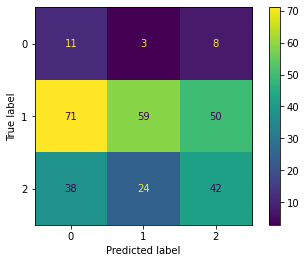

In [109]:
plot_confusion_matrix(rfc, X_test_vect, y_test)

In [110]:
rfc_grid = {'n_estimators': np.arange(50, 100, 10),
    'max_depth': np.arange(3, 15, 4),
    'criterion': ['gini', 'entropy']
}

In [111]:
rfc_cv = GridSearchCV(estimator = rfc, param_grid = rfc_grid, cv = 5)

In [112]:
#rfc_cv.fit(X_train_vect, y_train)

In [113]:
#best_rfc = rfc_cv.best_estimator_

In [114]:
#rfc_cv.best_params_

In [115]:
#print(classification_report(best_rfc.predict(X_test_vect), y_test))

In [116]:
#plot_confusion_matrix(best_rfc, X_test_vect, y_test)

In [117]:
svcl = svm.SVC()
svcl.fit(X_train_vect, y_train)
svcl_score = svcl.score(X_test_vect, y_test)
print("Results for Support Vector Machine with TFIDF-Vectorizer")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vect)

Results for Support Vector Machine with TFIDF-Vectorizer
0.35947712418300654


In [118]:
print(classification_report(svcl.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15       121
           1       0.32      0.69      0.43        83
           2       0.40      0.41      0.41       102

    accuracy                           0.36       306
   macro avg       0.41      0.40      0.33       306
weighted avg       0.42      0.36      0.31       306



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


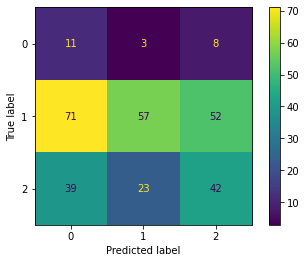

In [119]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [120]:
params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
clf_sv = GridSearchCV(svcl, params)
clf_sv.fit(X_train_vect, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'kernel': ('linear', 'rbf')})

In [121]:
best_sv = clf_sv.best_estimator_

In [122]:
print(classification_report(best_sv.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15       120
           1       0.32      0.68      0.43        84
           2       0.39      0.40      0.40       102

    accuracy                           0.36       306
   macro avg       0.40      0.39      0.33       306
weighted avg       0.41      0.36      0.31       306



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


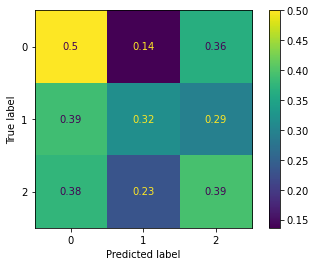

In [123]:
plot_confusion_matrix(best_sv, X_test_vect, y_test, normalize = 'true')

In [124]:
mnb = MultinomialNB()

mnb.fit(X_train_vect, y_train)

y_preds_mnb = mnb.predict(X_test_vect)


In [125]:
print(classification_report(mnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.64      0.10      0.17       144
           1       0.28      0.69      0.40        72
           2       0.34      0.39      0.36        90

    accuracy                           0.32       306
   macro avg       0.42      0.39      0.31       306
weighted avg       0.46      0.32      0.28       306



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


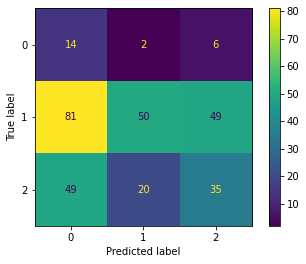

In [126]:
plot_confusion_matrix(mnb, X_test_vect, y_test)

In [127]:
cnb = ComplementNB()

cnb.fit(X_train_vect, y_train)

y_preds_mnb = cnb.predict(X_test_vect)

In [128]:
print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.59      0.09      0.16       139
           1       0.32      0.70      0.44        81
           2       0.33      0.40      0.36        86

    accuracy                           0.34       306
   macro avg       0.41      0.40      0.32       306
weighted avg       0.44      0.34      0.29       306



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


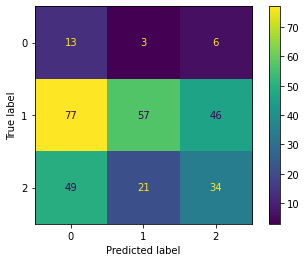

In [129]:
plot_confusion_matrix(cnb, X_test_vect, y_test)